# 线性回归算法的实现

In [1]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

## 生成数据集
给定W和b，生成数据集。
d2l.synthetic_data生成均值为0，方差为1的X，并添加均值为0，方差为0.01的noise

In [2]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)
help(d2l.synthetic_data)

Help on function synthetic_data in module d2l.torch:

synthetic_data(w, b, num_examples)
    Generate y = Xw + b + noise.
    
    Defined in :numref:`sec_linear_scratch`



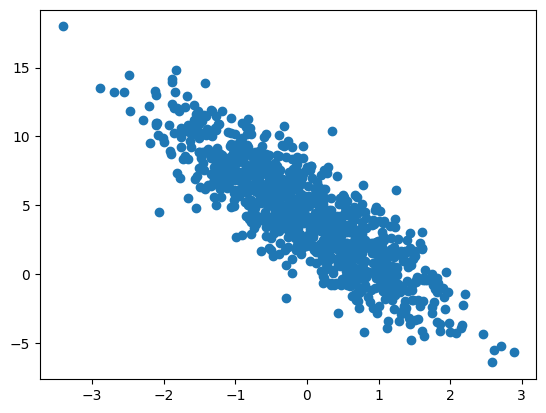

In [3]:
d2l.plt.scatter(features[:,1], labels)

## 读取数据集


In [5]:
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """构造一个数据迭代器
       Parameters:
       ---------------
       data_arrays: features ans labels
       batch_size: the size of batch
       is_train: the dataset is training set or not, if it is training set then need to shuffle the order randomly
    """
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [14]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)
next(iter(data_iter))

[tensor([[ 0.4064, -0.7946],
         [-0.4538, -1.0685],
         [-2.2389, -0.4744],
         [ 1.5116, -1.6774],
         [ 0.5434, -0.0992],
         [ 1.2088,  0.1180],
         [ 0.3532, -1.2519],
         [-0.0444,  0.9578],
         [-0.3146, -0.0572],
         [ 2.0471,  0.2805]]),
 tensor([[ 7.7137],
         [ 6.9269],
         [ 1.3180],
         [12.9134],
         [ 5.6232],
         [ 6.2025],
         [ 9.1656],
         [ 0.8615],
         [ 3.7560],
         [ 7.3422]])]